# Distribución de probabilidad Binomial
1. Una distribución de probabilidad es una distribución que indica la probabilidad de cada valor de la variable aleatoria. 
2. A menudo se expresa como gráfica, tabla o fórmula.
3. Una distribución de probabilidad es como una distribución de frecuencias, 
    + en dónde la frecuencia o valor correspondiente a cada valor de x es un valor de probabilidad.
###### Ver Distribución discreta de probabilidad binomial en: https://www.chreinvent.com/recursos/distribuci%C3%B3n-binomial    

In [14]:
import math
from statistics import mean, median, mode, variance, stdev
from itertools import accumulate
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import binom

## Muestreo de aceptación
La compañía Medassist Pharmaceutical Company recibe grandes embarques de tabletas de aspirina y usa el siguiente plan de muestreo de aceptación: seleccionar al azar y probar 24 tabletas, después aceptar el grupo completo sólo si hay una o cero tabletas que no cumplan con las especificaciones requeridas. 
+ Si un embarque particular de miles de tabletas de aspirina tiene en realidad una tasa de defectos del 4%, ¿cuál es la probabilidad de que el embarque completo sea aceptado?


### Parametros

In [15]:
# Definición de parámetros del problema
n = 24   # Número de tabletas
p = 0.96  # Probabilidad de ser seleccionado
x = [ x for x in range(n+1)] # x varia de 0 a n=24

### Construcción de la distribución binomial

In [16]:
# Calculo de la distribución de probabilidad binomial
# Lista con las probabilidades simples para cada x
d_prob = [binom.pmf(x, n, p) for x in range(n + 1)]

# Lista con las probabilidades acumuladas para cada x
d_prob_ac = list(accumulate(d_prob))

# Lista con las probabilidades acumuladas en orden inverso
d_prob_ac_inv = list(accumulate(d_prob[::-1]))[::-1]

# Imprimir cada número con dos decimales usando f-string # for num in dist_prob_ac: print(f"{num:.2f}")

### Tabla y Gráficos
+ Probabilidades: La suma de la probabilidad debe dar 1
+ Media: La suma-producto de x por su probabilidad debe dar la media
+ Varianza: La suma-producto de x al cuadrado por la probabilidad menos la media debe dar la varianza
+ Desviación Estandard: La raiz cuadrada de la varianza debe dar la desviación estandard

        p    x.p     xx.p  p-acu  p-acr
x                                      
0   0.000  0.000    0.000  0.000  1.000
1   0.000  0.000    0.000  0.000  1.000
2   0.000  0.000    0.000  0.000  1.000
3   0.000  0.000    0.000  0.000  1.000
4   0.000  0.000    0.000  0.000  1.000
5   0.000  0.000    0.000  0.000  1.000
6   0.000  0.000    0.000  0.000  1.000
7   0.000  0.000    0.000  0.000  1.000
8   0.000  0.000    0.000  0.000  1.000
9   0.000  0.000    0.000  0.000  1.000
10  0.000  0.000    0.000  0.000  1.000
11  0.000  0.000    0.000  0.000  1.000
12  0.000  0.000    0.000  0.000  1.000
13  0.000  0.000    0.000  0.000  1.000
14  0.000  0.000    0.000  0.000  1.000
15  0.000  0.000    0.000  0.000  1.000
16  0.000  0.000    0.001  0.000  1.000
17  0.000  0.000    0.008  0.000  1.000
18  0.000  0.005    0.086  0.000  1.000
19  0.002  0.038    0.723  0.002  1.000
20  0.012  0.240    4.809  0.014  0.998
21  0.055  1.154   24.240  0.069  0.986
22  0.180  3.957   87.065  0.249  0.931


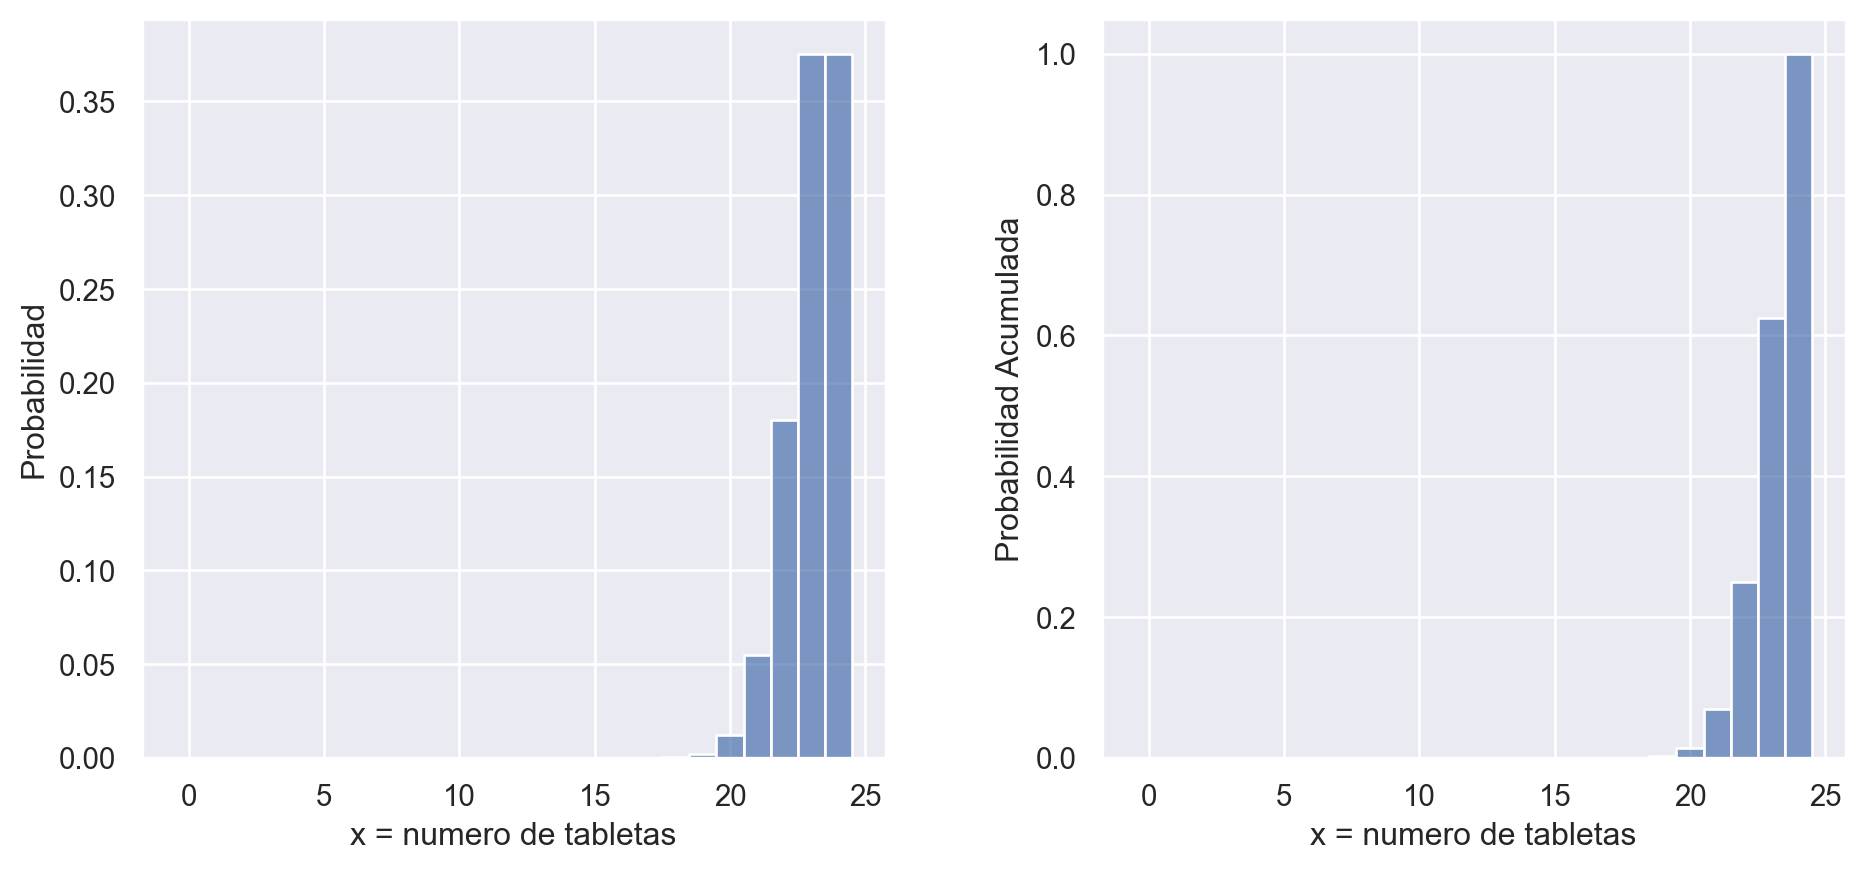

In [17]:
# Dataframe: Tabla de datos
df_tv = pd.DataFrame(
    {
        'x': x,
        'p': d_prob,
        'x.p': [x[i] * d_prob[i] for i in range(n+1)],
        'xx.p': [x[i]**2 * d_prob[i] for i in range(n+1)],
        'p-acu': d_prob_ac,
        'p-acr': d_prob_ac_inv      
    }
)
print(df_tv.round(3).set_index('x'))

# Estadisticos: Calculo de la media de la distribución de probabilidad
print(f"\nEstadísticos:")

# Calculos: sumatoria de probabilidades, media, varianza y desviación estandard
sumprob = df_tv.p.sum()
media = df_tv['x.p'].sum()
sum_xx_p = df_tv['xx.p'].sum()
varianza = sum_xx_p - media ** 2
desvstan = math.sqrt(varianza)

# Impresión de estadísticos
print(f"Sumatoria de probabilidades: {sumprob}")
print(f"Media y Esperanza          : {media}")
print(f"Varianza                   : {varianza:.3f}")
print(f"Desviación Estandard       : {desvstan:.3f}")

# Revisión de estadísticos por Scipy
# La función de distribución binomial de SciPy binom.stats devuelve: Los momentos de primero a cuarto orden:
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

print("Revisión de estadísticos por scipy:")
print(f"mean: {mean:.2f}, var: {var:.2f}, skew: {skew:.2f}, kurt: {kurt:.2f}.")

# Gráficos
# Distribución de probabilidad binomial
f = mpl.figure.Figure(figsize=(10, 5))
sf1, sf2 = f.subfigures(1, 2)
# Visualización con Seaborn Objects
# Crear la figura y los ejes
(
    so.Plot(df_tv, x="x", y="p")
    .add(so.Bars(),)
    .label(x="x = numero de tabletas", y="Probabilidad")
    .on(sf1)
    .plot()
)

# Visualización con Seaborn Objects
# Crear la figura y los ejes
(
    so.Plot(df_tv, x="x", y="p-acu")
    .add(so.Bars())
    .label(x="x = numero de tabletas", y="Probabilidad Acumulada")
    .on(sf2)
)



##### Observaciones:
+ El numero de aspirinas, en buen estado, esperable es 23.04. (Esperanza: 23.040000000000006)
+ La distribución está sesgada a la izquierda (sesgo negativo):
    + La probabilidad de aspirinas ok, aumenta cuanto mayor es la cantidad de aspirinas evaludadas.
    + El desvío es una persona (0.96) es decir a lo sumo habrá una aspirina mala aunque la probabilidad de esto es baja.

### Resultados más esperables y menos esperables
Regla práctica del intervalo: a) valor mínimo + común   : media - dos desvíos estandard.    b) valor máximo + común  : media  + dos desvios estandard.  

In [18]:
# Calculos de valores minimo y máximo comunes dentro de los cuales se encuentra el 95% 
# de los valores de la distribución de probabilidad.
val_min_comun = media - 2 * desvstan
val_max_comun = media + 2 * desvstan

# Impresión de resultados
print(f"Intervalo de confianza:")
print(f"media: {media:.2f}, desv.std.: {desvstan:.2f}, 2 x desv.: {2*desvstan:.2f}.")
print(f"Valor mínimo más común: {val_min_comun:.2f} y Valor máximo más común: {val_max_comun:.2f}")
print(f"Los valores más probables de x están entre {val_min_comun:.2f} y {val_max_comun:.2f}")
print(f"El valor más esperable es: {media:.2f}")

Intervalo de confianza:
media: 23.04, desv.std.: 0.96, 2 x desv.: 1.92.
Valor mínimo más común: 21.12 y Valor máximo más común: 24.96
Los valores más probables de x están entre 21.12 y 24.96
El valor más esperable es: 23.04


**Interpretación:** El intevalo de confianza refleja que:
+ Es esperable que las aspirinas ok estén entre 21 y 24 personas.
    + El 95% de los resultados más probables se encuentra sesgado a la derecha (sesgo positivo):
        + Es más probable que existan muchas aspirinas ok dentro de la muestra que pocas.
        + Es poco probable que muchas muchas aspirinas no esten ok dentro de la muestra.
    + El 5% de los resultados menos probables se encuentra a la derecha:
        + Para mas de 23 aspirinas o mas, la probabilidad decrece significativamente (p-acr).
        + Es difícil que por azar existan 1 o más aspirinas en mal estado o no ok.

#### Resultados infrecuentes
+ Uso de las probabilidades para determinar resultados infrecuentes
    + Número de éxitos inusualmente alto: x éxitos en n ensayos es un número inusualmente alto de éxitos si P(x o más)  0.05.*
    + Número de éxitos inusualmente bajo: x éxitos en n ensayos es un número inusualmente bajo de éxitos si P(x o menos)  0.05.*
+ *El valor de 0.05 se utiliza de forma regular (coincide con el intervalo de confianza 95%), pero no es absolutamente rígido. 
    + Se podrían usar otros valores, como 0.01, para distinguir entre sucesos que pueden ocurrir con facilidad por azar y sucesos que tienen muy pocas probabilidades de ocurrir por azar.

        p    x.p     xx.p  p-acu  p-acr
x                                      
0   0.000  0.000    0.000  0.000  1.000
1   0.000  0.000    0.000  0.000  1.000
2   0.000  0.000    0.000  0.000  1.000
3   0.000  0.000    0.000  0.000  1.000
4   0.000  0.000    0.000  0.000  1.000
5   0.000  0.000    0.000  0.000  1.000
6   0.000  0.000    0.000  0.000  1.000
7   0.000  0.000    0.000  0.000  1.000
8   0.000  0.000    0.000  0.000  1.000
9   0.000  0.000    0.000  0.000  1.000
10  0.000  0.000    0.000  0.000  1.000
11  0.000  0.000    0.000  0.000  1.000
12  0.000  0.000    0.000  0.000  1.000
13  0.000  0.000    0.000  0.000  1.000
14  0.000  0.000    0.000  0.000  1.000
15  0.000  0.000    0.000  0.000  1.000
16  0.000  0.000    0.001  0.000  1.000
17  0.000  0.000    0.008  0.000  1.000
18  0.000  0.005    0.086  0.000  1.000
19  0.002  0.038    0.723  0.002  1.000
20  0.012  0.240    4.809  0.014  0.998
21  0.055  1.154   24.240  0.069  0.986
22  0.180  3.957   87.065  0.249  0.931


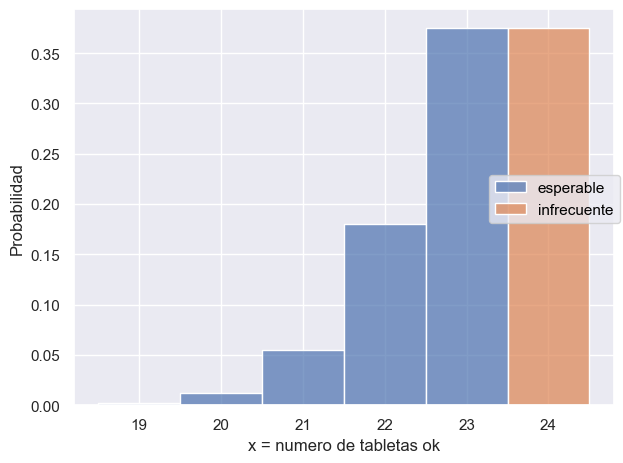

In [19]:
df_m = df_tv.round(3).set_index('x')
print(df_m)
# Añadir una columna de color
df_m['Miembros'] = ['esperable' if i <= 23 else 'infrecuente' for i in df_tv['x']]

# Crear la figura y los ejes usando seaborn.objects
hist = (
    so.Plot(df_m, x='x', y='p', color='Miembros')
    .add(so.Bars())
    .label(x="x = numero de tabletas ok", y="Probabilidad", color="")
)

# Mostrar el gráfico , color = df_miembros['x'][df_miembros['x'] < 8]
hist.show()

**Resultados infrecuentes:**
+ La regla del intervalo nos dice que los resultados infrecuentes son aquellos con una probabilidad acumulada menor al 5%.
+ Se utiliza la probabilidad acumulada porque aunque los resultados son muy poco probables, siguen teniendo una probabilidad.

__________________________________________________________________________________________________________________________